In [2]:
import sys
sys.path.append("../../")
import numpy as np
import pandas as pd
import collections
import json
import matplotlib.pyplot as plt
import matplotlib

from utils import mpl_stylesheet
from mpl_toolkits.axes_grid1 import make_axes_locatable
import utils
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 300)

In [3]:
tissue_file = '../../plots/tissue_table.txt'
json_file = '../../gtex_v8_metadata.json'

In [4]:
RESINFO_FIELDS = ['ntrans', 'enrich', 'pvalue']
class ResInfo(collections.namedtuple('_ResInfo', RESINFO_FIELDS)):
    __slots__ = ()

def read_results_dhsindex(filename):
    res = collections.defaultdict(dict)
    with open(filename, 'r') as infile:
        for line in infile:
            linesplit = line.strip().split("\t")
            tissue = linesplit[0]
            dhs_type = linesplit[1]
            ntrans = int(linesplit[2])
            inregion = int(linesplit[3])
            enrich = float(linesplit[4])
            pvalue = float(linesplit[5])
            res[tissue][dhs_type] = ResInfo(ntrans = ntrans, enrich = enrich, pvalue = pvalue)
    return res

In [5]:
from utils import utils
import operator

chrmlist = np.arange(1,23)

tshorts, tfulls, tstrings = utils.read_tissues_str(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors  = dict()
tissue_names   = dict()
tissue_samples = dict()
for tshort, tstring in zip(tshorts, tstrings):
    tissue_names[tshort] = tstring
        
for tshort, tfull in zip(tshorts, tfulls):
    tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]
    tissue_samples[tshort] = gtex_meta[tfull.replace(" ", "_")]["rnaSeqAndGenotypeSampleCount"]

#sorted_tissues = [x[0] for x in sorted(tissue_samples.items(), key=operator.itemgetter(1))]
        
brain_tissues = ['bam', 'ban', 'bca', 'bceh', 'bce', 'bco', 'bfr', 'bhi', 'bhy', 'bnu', 'bpu', 'bsp', 'bsu']
tshorts = [t for t in tshorts if t not in brain_tissues]

In [6]:
dhs_res_file = "/cbscratch/franco/trans-eqtl/dev-pipeline/gtex_v8_lncRNA_freeze/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30/dhsindex/dhs_enrichment_DHSindex_5e-08.txt.ld_prune"
res = read_results_dhsindex(dhs_res_file)

In [7]:
types = (list(res['as'].keys()))
matrix = np.zeros((len(tshorts), len(types)))
print(matrix.shape)
for i, tissue in enumerate(tshorts):
    for j, typ in enumerate(types):            
        if tissue in res and res[tissue][typ].pvalue <= 1:
            value = res[tissue][typ].enrich
            matrix[i,j] = np.log2(value) if value > 0 else np.nan
        else:
            matrix[i,j] = np.nan

DATA = pd.DataFrame(matrix, columns=types, index=tshorts)
    

(37, 17)


In [8]:
DATA

,all,Cancer / epithelial,Cardiac,Digestive,Lymphoid,Musculoskeletal,Myeloid / erythroid,Neural,Organ devel. / renal,Placental / trophoblast,Primitive / embryonic,Pulmonary devel.,Renal / cancer,Stromal A,Stromal B,Tissue invariant,Vascular / endothelial
as,0.356927,0.183754,0.750221,-0.171005,0.026110,1.159235,0.553582,0.448082,-0.521590,0.622708,0.460275,NaN,-1.126332,NaN,0.380559,-1.057996,1.712684
av,0.243767,1.048556,-0.099282,0.638128,0.397323,0.558240,NaN,1.655134,-0.740945,-0.378113,-0.582261,0.442394,-0.328831,NaN,-0.596266,0.686502,NaN
ag,0.107951,NaN,NaN,NaN,-0.054307,0.137731,NaN,1.082834,NaN,0.777501,-0.157193,1.561090,1.845119,NaN,-0.468192,0.912768,NaN
aa,0.236826,-0.461882,0.056585,0.079691,0.472279,0.252541,-0.219909,0.218263,0.376250,0.327756,0.505979,-0.433841,0.383642,0.188036,-0.335026,0.145190,0.600200
ac,0.357118,0.703688,-0.254467,-0.281090,0.147127,0.200373,0.832765,0.308768,-0.364274,0.186701,0.594339,-0.172757,-0.511625,0.432375,0.608981,0.264290,0.903115
at,0.342522,0.731921,-0.329081,-0.627917,0.494756,-0.285528,0.704157,0.984094,-1.058604,0.667173,0.259969,0.139760,1.433385,NaN,0.109427,NaN,0.235671
bl,0.285007,2.086844,NaN,1.255770,0.447485,NaN,1.004045,0.558984,NaN,0.258408,-0.308792,NaN,1.315271,NaN,1.039370,NaN,NaN
br,0.082478,0.111869,0.590234,NaN,0.495936,0.647051,0.049423,0.193266,NaN,0.859338,0.461194,NaN,NaN,NaN,-0.380878,0.365625,NaN
ebv,0.644681,1.660292,1.533764,NaN,0.398006,0.557256,0.968781,0.559147,-0.133152,0.187296,0.877382,NaN,0.284107,NaN,1.569313,NaN,NaN
fib,0.101858,NaN,NaN,NaN,0.626647,1.800475,0.195484,-0.235654,1.096406,1.033786,-0.097395,NaN,NaN,1.904008,NaN,0.569351,NaN


In [9]:
import fastcluster
from scipy.cluster import hierarchy

def calculate_linkage(matrix, rows = False, cols = False):
    if rows:
        data = matrix
        row_linkage = fastcluster.linkage_vector(data.fillna(0).values,
                                   method='single',
                                   metric="euclidean")
        # row_linkage = hierarchy.linkage(data.fillna(0), method="average", metric='euclidean')

        row_dendrogram = hierarchy.dendrogram(row_linkage, no_plot=True, color_threshold=-np.inf)
        row_reordered_ind = row_dendrogram['leaves']

    if cols:
        data = matrix.T
        col_linkage = fastcluster.linkage_vector(data.fillna(0).values,
                                   method='single',
                                   metric="euclidean")
        # col_linkage = hierarchy.linkage(data.fillna(0), method="average", metric='euclidean')
    
        col_dendrogram = hierarchy.dendrogram(col_linkage, no_plot=True, color_threshold=-np.inf)
        col_reordered_ind = col_dendrogram['leaves']
        
    if rows and cols:
        return matrix.iloc[row_reordered_ind, col_reordered_ind]
    if cols:
        return matrix.iloc[:, col_reordered_ind]
    if rows:
        return matrix.iloc[row_reordered_ind, :]
    
data = calculate_linkage(DATA.T, rows=True, cols=True)

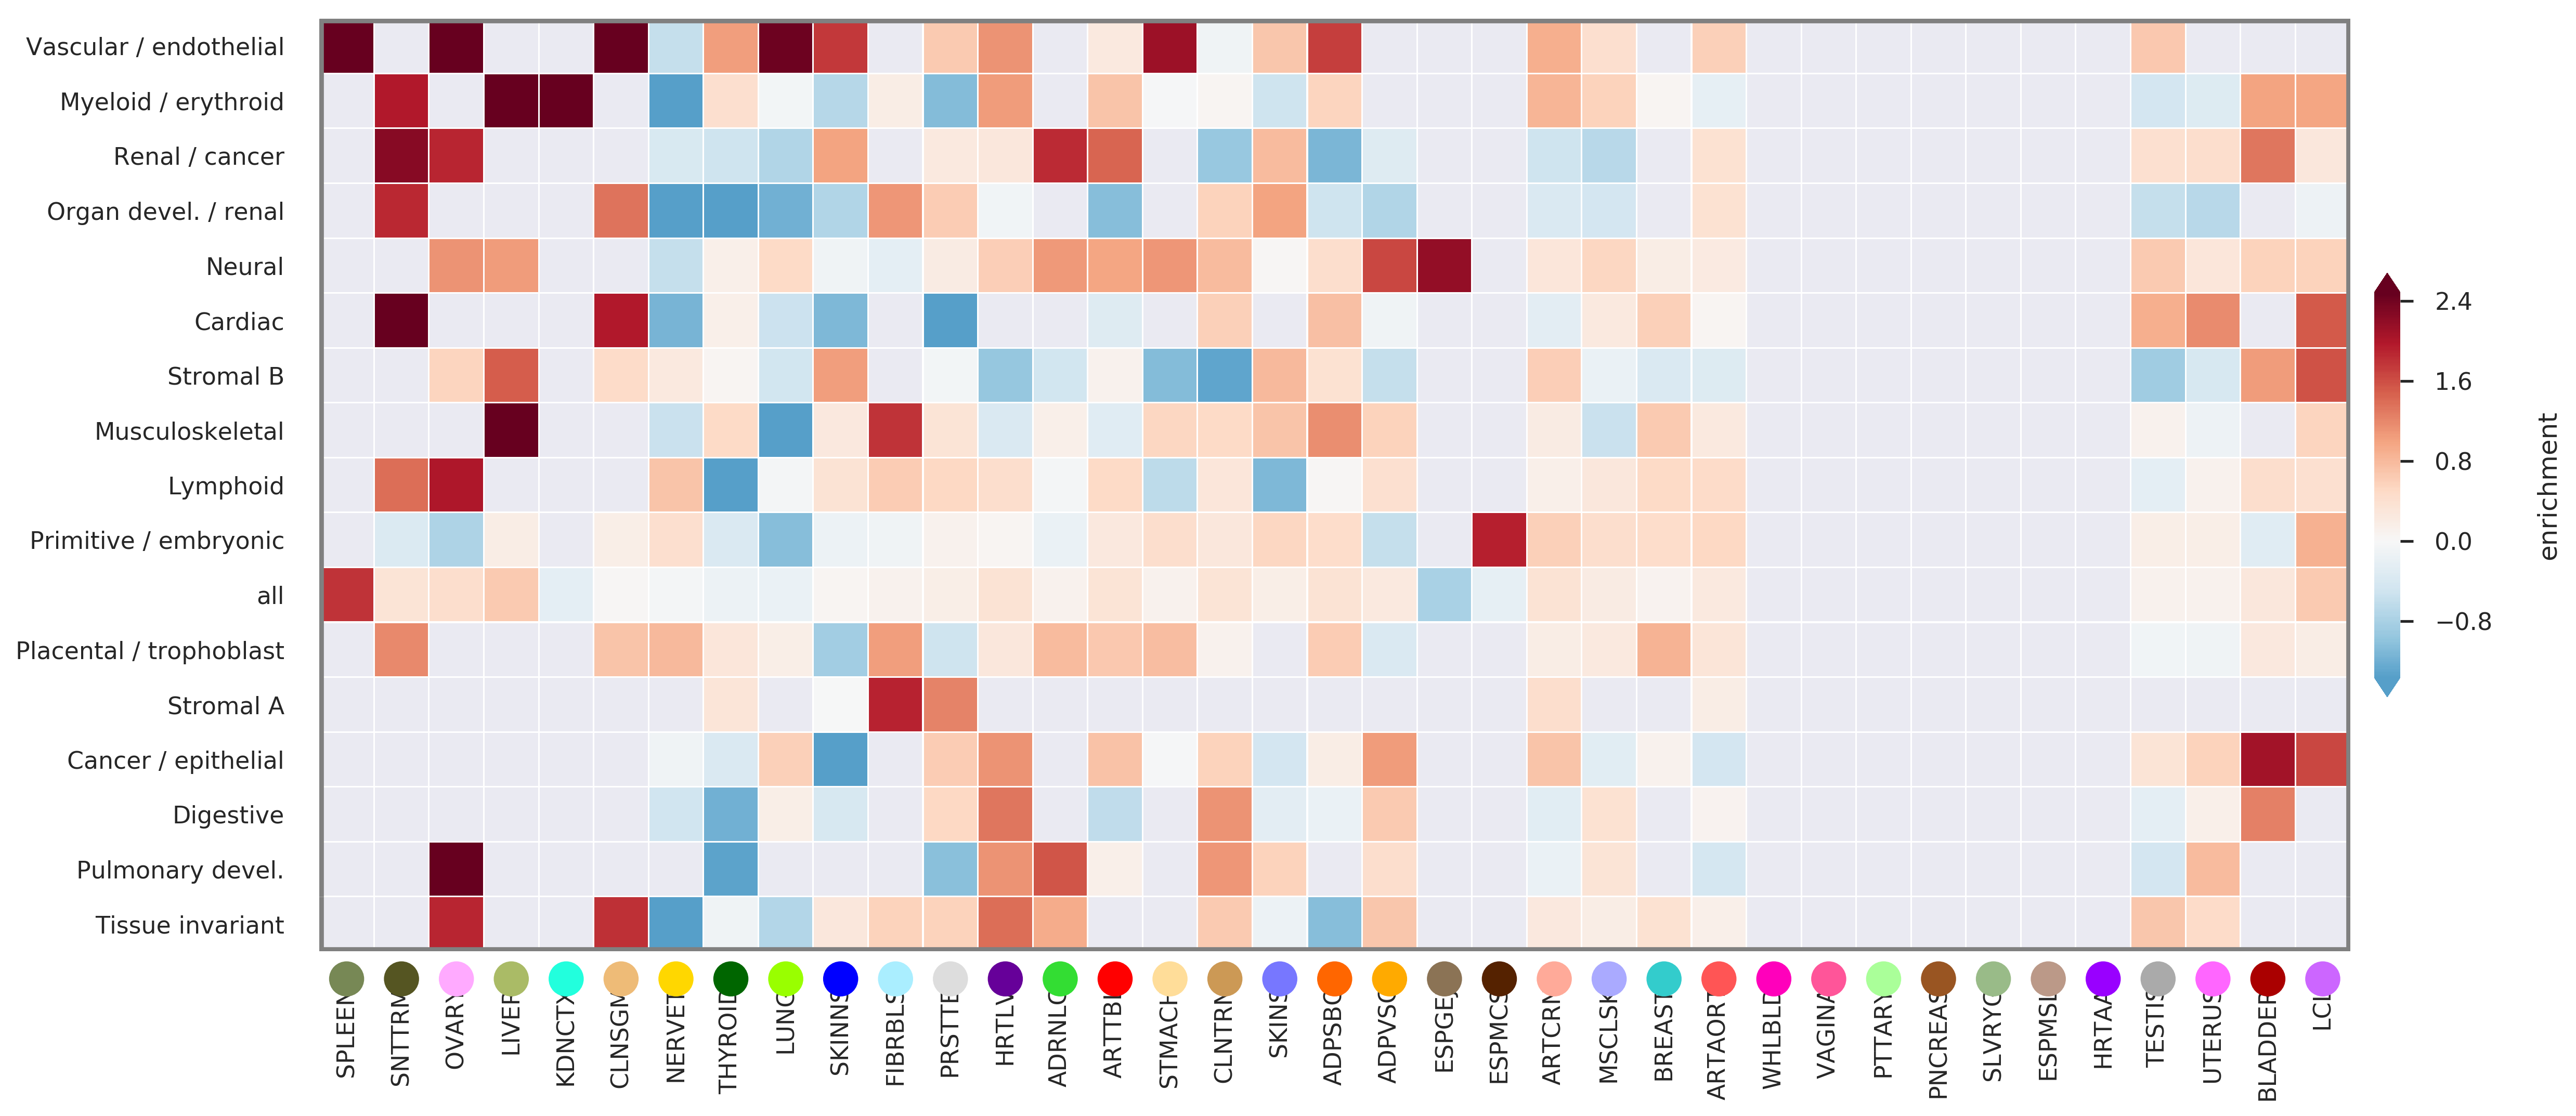

In [10]:
import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns; sns.set()

fig = plt.figure(figsize=(20,8), dpi=300)  
ax  = fig.add_subplot(111)
# cbar_ax = fig.add_axes([.905, .3, .05, .3])
cmap = plt.get_cmap("RdBu_r")

mymask = pd.isna(data)

h = sns.heatmap(data,
                cmap=cmap, #"RdBu_r",
                robust=True,
                linewidths=.5,
                center=.0,
                cbar_kws={'label': 'enrichment', 'shrink':0.45,
                          'extend':'both',
                          'pad':0.01,
                          'aspect':15},
                ax=ax,
                mask=mymask)

### Use this to change the colorbar ticks and labels
# cbar=plt.colorbar(ax)
# cbar.set_yticklabels(["a","a","a","a","a","a"])
# h.figure.axes[1].set_yticklabels(["-2","-1","0","1","2","3","> 4"])


# ax.set_yticklabels(data.index, rotation=90) #, ha='right')
# ax.set_xticklabels(data.columns, rotation=90) #, ha='right')

# Countour lines
ax.hlines([ax.get_ylim()[1]]  , *ax.get_xlim(), color='gray', lw=4)
ax.hlines([ax.get_ylim()[0]]  , *ax.get_xlim(), color='gray', lw=4)
ax.vlines([0,ax.get_xlim()[1]], ax.get_ylim()[0]-1, ax.get_ylim()[0], color='gray', lw=4)
ax.vlines([0,ax.get_xlim()[1]], ax.get_ylim()[0]-1, ax.get_ylim()[1], color='gray', lw=4)

    
# my_colors=[tissue_colors[t] for t in data.index]
# ax.set_aspect('equal')
# for t, X in zip(data.index, ax.get_yticks()):
#     ax.add_patch(patches.Circle((-0.5, X), radius=.3,
#                                  fill=True,clip_on=False, color=tissue_colors[t]))
    
# labels = ax.get_yticklabels()
# for label in labels:
#     label.set_x(label.get_position()[1] - 0.07 ) 

ax.set_aspect('equal')
# my_colors=[tissue_colors[t] for t in data.columns]
for c, X in zip(data.columns, ax.get_xticks()):
    ax.add_patch(patches.Circle((X, len(data.index)+0.5), radius=.3,
                                 fill=True, clip_on=False, color=tissue_colors[c]))
    
#     X-0.4, len(data.index)+0.3)

# labels = ax.get_yticklabels()
# ax.set_yticklabels([tissue_names[l.get_text()] for l in labels], rotation=0, ha='right')

labels = ax.get_xticklabels()
new_labels = list()
for l in labels:
    label = l.get_text()
    if label in tissue_names:
        new_labels.append(tissue_names[label])
    else:
        new_labels.append(label)
ax.set_xticklabels(new_labels, rotation=90, ha='center', va='top') #, rotation_mode="anchor")

# custom_legend = [ patches.Rectangle((0,0), width=1., height=1., facecolor="#ff960d", label='Sample Covariates') ,
#                   patches.Rectangle((0,0), width=1., height=1., facecolor="#00c465", label="Subject Covariates"), 
#                   patches.Rectangle((0,0), width=1., height=1., facecolor="#7223e8", label="Genotype and Others")]

# ax.legend(bbox_to_anchor=(-0.2, -0.35, -0.5, 0.),borderaxespad=0., handles=custom_legend, loc='lower left')
# plt.savefig("../plots/DHSindex_figure.png", bbox_inches = 'tight')
# plt.savefig("../plots/DHSindex_figure.pdf", bbox_inches = 'tight')

plt.show()
